In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Step 1: Load the dataset

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Step 2: Data Preprocessing

In [ ]:

# Convert 'TotalCharges' to numeric, coercing errors into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with column means only for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
# Define the features (X) and the target (y)
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Step 3: Build the ANN Model


In [ ]:
# Initialize the ANN model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Add the second hidden layer
model.add(Dense(units=8, activation='relu'))

In [ ]:
# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Step 4: Train the Model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7079 - loss: 0.5756 - val_accuracy: 0.7956 - val_loss: 0.4280
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7981 - loss: 0.4272 - val_accuracy: 0.7946 - val_loss: 0.4189
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8191 - loss: 0.4011 - val_accuracy: 0.8045 - val_loss: 0.4099
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8548 - loss: 0.3525 - val_accuracy: 0.8074 - val_loss: 0.4095
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8831 - loss: 0.3047 - val_accuracy: 0.8036 - val_loss: 0.4112
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9575 - loss: 0.2053 - val_accuracy: 0.7922 - val_loss: 0.4343
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.1145 - val_accuracy: 0.7951 - val_loss: 0.4349
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9981 - loss: 0.0517 - val_accuracy: 0

Step 5: Evaluate the Model

In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1256  283]
 [ 229  345]]


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.82      0.83      1539
        True       0.55      0.60      0.57       574

    accuracy                           0.76      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.77      0.76      0.76      2113



 Step 6: Insights

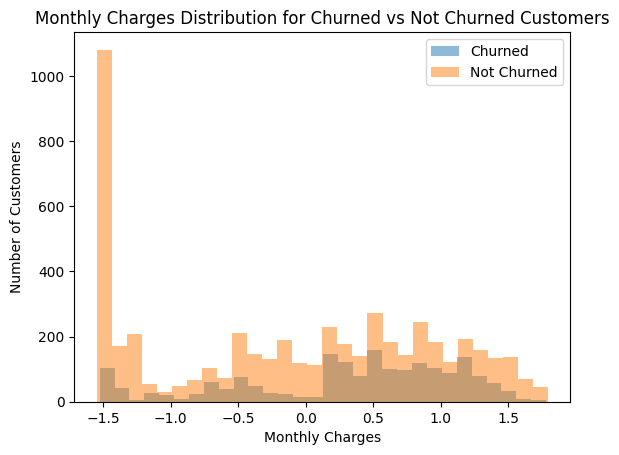

In [ ]:
# Example: Influence of MonthlyCharges
import matplotlib.pyplot as plt

plt.hist(df[df['Churn_Yes'] == 1]['MonthlyCharges'], bins=30, alpha=0.5, label='Churned')
plt.hist(df[df['Churn_Yes'] == 0]['MonthlyCharges'], bins=30, alpha=0.5, label='Not Churned')
plt.title('Monthly Charges Distribution for Churned vs Not Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


In [ ]:
# Calculate churn rate by contract type
contract_churn = df.groupby('Contract_One year')['Churn_Yes'].mean()
print("Churn Rate by Contract Type:")
print(contract_churn)

Churn Rate by Contract Type:
Contract_One year
False    0.305745
True     0.112695
Name: Churn_Yes, dtype: float64


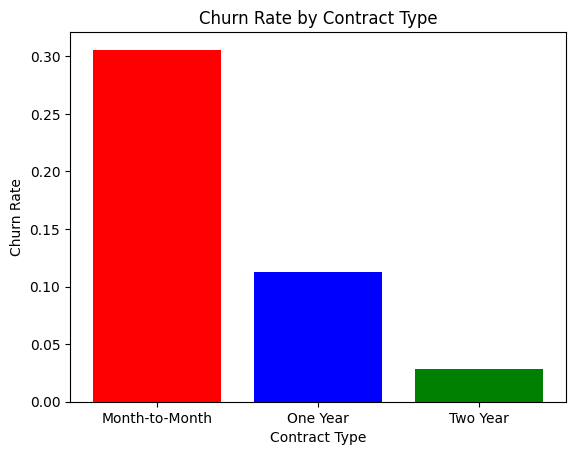

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for churn rate by contract type
contract_labels = ['Month-to-Month', 'One Year', 'Two Year']
contract_churn_rates = [df[df['Contract_One year'] == 0]['Churn_Yes'].mean(),
                        df[df['Contract_One year'] == 1]['Churn_Yes'].mean(),
                        df[df['Contract_Two year'] == 1]['Churn_Yes'].mean()]

plt.bar(contract_labels, contract_churn_rates, color=['red', 'blue', 'green'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


In [ ]:
# Group tenure into bins (e.g., 0-12 months, 12-24 months, etc.)
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72])

# Calculate churn rate by tenure group
tenure_churn = df.groupby('TenureGroup')['Churn_Yes'].mean()
print("Churn Rate by Tenure Group:")
print(tenure_churn)


Churn Rate by Tenure Group:
TenureGroup
(0, 12]     0.125153
(12, 24]         NaN
(24, 36]         NaN
(36, 48]         NaN
(48, 60]         NaN
(60, 72]         NaN
Name: Churn_Yes, dtype: float64


<ipython-input-21-e6209c99f556>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn_Yes'].mean()


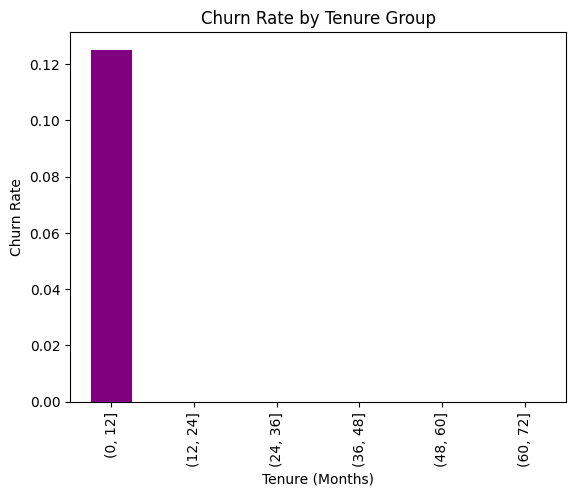

In [ ]:
# Bar plot for churn rate by tenure group
tenure_churn.plot(kind='bar', color='purple')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.show()